## The Sparks Foundation - Data Science and Business Analytics Intern

### Task1: Prediction using Supervised Machine Learning

##### **Predict the percentage of an student based on the no. of study hours using Simple Linear Regression**

### Author: Ferdick Nishanth R

### Importing the Libraries

In [83]:
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

 ### Reading the data

In [84]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Analysing the data

In [85]:
#let's explore our dataset a bit
data.shape

(25, 2)

our dataset has 25 rows and 2 columns

In [86]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [87]:
#Check for any null values in the Dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [89]:
#statistical details of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the dataset

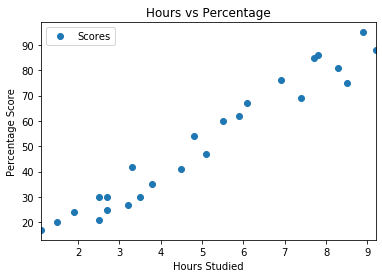

In [90]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph plot, we can see that there is a positive linear relation between the number of hours studied and percentage of score.

### Training the Model

#### 1) Splitting the Data

In [91]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values #Independent Variable
y = data.iloc[:, 1].values #Dependent Variable

# Spliting the Dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#### 2) Fitting the Data into the model

In [92]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
print("Model is Trained")

Model is Trained


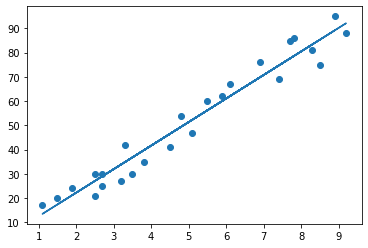

In [100]:
# plotting test data using the previously trained test data
line = regressor.intercept_+regressor.coef_*X
plt.scatter(X, y)  
plt.plot(X, line);  
plt.show()

In [94]:
print(regressor.intercept_)

2.794196676599803


In [95]:
print(regressor.coef_)

[9.71054094]


This means that for every one unit of change in hours studied, the change in the score is about 9.78%

In [96]:
y_pred = regressor.predict(X_test)

In [97]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


### Making Predictions

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [98]:
hours = [9.25]
answer = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(answer[0])) 

No of Hours = [9.25]
Predicted Score = 92.61670033840096


So here we can see that if a student studies for 9.25 hours a day he/she is likely to score 92.91 marks.

### Evaluating the Model

In [99]:
print('r-square value:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

r-square value: 0.9487647340257012
Mean Absolute Error: 4.499999999999998


Here we can see that r-squared value & Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.